<a href="https://colab.research.google.com/github/OVP2023/ML/blob/main/laba_ML_%D0%BC%D0%BE%D0%B9_%D0%B2%D0%B0%D1%80%D0%B8%D0%B0%D0%BD%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Этапы работы:

    Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
    Проведите первичный разведочный анализ данных.
    a) Проверьте данные на пропуски.
    b) Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).
    c) Визуализируйте распределение количества флагов по религиям.
    Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
    Обучите любую модель классификации на выбор.
    Для тестового множества сделайте предсказание целевой переменной. Выведите метрики модели с помощью metrics.classification_report. Можно использовать любой другой альтернативный метод подсчета метрик.
    Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
    a) Сделайте выводы.

    Обработайте выбросы в данных.
    a) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot.
    b) Исследуйте признаки на выбросы. Удалите выбросы, если они были найдены/вы считаете это необходимым.

    Проведите нормализацию признаков.
    a) Выберите признаки для нормализации, предложите способы для их обработки.
    Повторите п. 4, п. 5.
    Сбалансируйте классы путем oversampling/undersampling.
    a) Повторите п. 4, п. 5.
    Уменьшите размерность пространства признаков.
    a) Повторите п. 4, п. 5.
    Примените любой метод на ваше усмотрение для отбора признаков.
    a) Повторите п. 4, п. 5. Укажите количество выбранных признаков.
    Оптимизируйте параметры модели из п. 4.
    a) Повторите п. 4, п. 5.
    Обучите стекинг трех моделей, включая модель с оптимизированными параметрами.
    Выберите результат с лучшими метриками и постройте для него Confusion Matrix.
    *Творческий пункт. Предложите что-то интересное для датасета.
    Сделайте выводы.

In [2]:
import pandas as pd

cols = ['name','landmass','zone','area','population','language','religion','bars','stripes',
       'colours','red','green','blue','gold','white','black','orange','mainhue','circles',
       'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate',
       'text','topleft','botright']
data = pd.read_csv('/content/drive/MyDrive/Datasets/flag.data',header=None,names=cols)
data.head(10)

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
5,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
8,Argentina,2,3,2777,28,2,0,0,3,2,...,0,0,0,0,0,0,0,0,blue,blue
9,Argentine,2,3,2777,28,2,0,0,3,3,...,0,0,1,0,0,0,0,0,blue,blue


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    object
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

In [14]:
#Разбиваем признаки на категории
black_list = ['name'] #we balck list country name as with it we need just wiki to predicit religion
categoricals = ['landmass','zone','language','mainhue','topleft','botright']
dummies = ['red','green','blue','gold','white','black','orange','crescent','triangle','icon','animate','text']
continious = ['area', 'population', 'bars', 'stripes', 'colours','circles', 'crosses', 'saltires', 'quarters', 'sunstars']
target = 'religion'

In [6]:
data[continious].describe()

,landmass,zone,language,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,5.340206,700.046392,23.268041,0.453608,1.551546,3.463918,0.170103,0.149485,0.092784,0.149485,1.386598
std,1.553018,1.308274,3.496517,2170.927932,91.934085,1.038339,2.328005,1.300154,0.463075,0.385387,0.290879,0.435860,4.396186
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,2.000000,9.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,6.000000,111.000000,4.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,9.000000,471.250000,14.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,6.000000,4.000000,10.000000,22402.000000,1008.000000,5.000000,14.000000,8.000000,4.000000,2.000000,1.000000,4.000000,50.000000


In [7]:
data[data.area == 0]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
15,Barbados,1,4,0,0,1,1,3,0,3,...,0,0,0,0,0,1,0,0,blue,blue
19,Bermuda,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,0,white,red
24,British-Virgin-Isles,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,1,white,blue
33,Cayman-Islands,1,4,0,0,1,1,0,0,6,...,1,1,4,0,0,1,1,1,white,blue
41,Cook-Islands,6,3,0,0,1,1,0,0,4,...,1,1,15,0,0,0,0,0,white,blue
48,Dominica,1,4,0,0,1,1,0,0,6,...,0,0,10,0,0,0,1,0,green,green


In [8]:
data[data.population==0]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
12,Bahamas,1,4,19,0,1,1,0,3,3,...,0,0,0,0,1,0,0,0,blue,blue
13,Bahrain,5,1,1,0,8,2,0,0,2,...,0,0,0,0,0,0,0,0,white,red
15,Barbados,1,4,0,0,1,1,3,0,3,...,0,0,0,0,0,1,0,0,blue,blue
17,Belize,1,4,23,0,1,1,0,2,8,...,0,0,0,0,0,1,1,1,red,red
19,Bermuda,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,0,white,red
24,British-Virgin-Isles,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,1,white,blue


In [9]:
data[dummies].agg(['min','max', 'nunique'])

,red,green,blue,gold,white,black,orange,crescent,triangle,icon,animate,text
min,0,0,0,0,0,0,0,0,0,0,0,0
max,1,1,1,1,1,1,1,1,1,1,1,1
nunique,2,2,2,2,2,2,2,2,2,2,2,2


In [12]:
total = 0
for cat in categoricals:
    total += len(data[cat].unique())
    print(cat,len(data[cat].unique()))
print('Total:',total)

landmass 6
zone 4
language 10
mainhue 8
topleft 7
botright 8
Total: 43


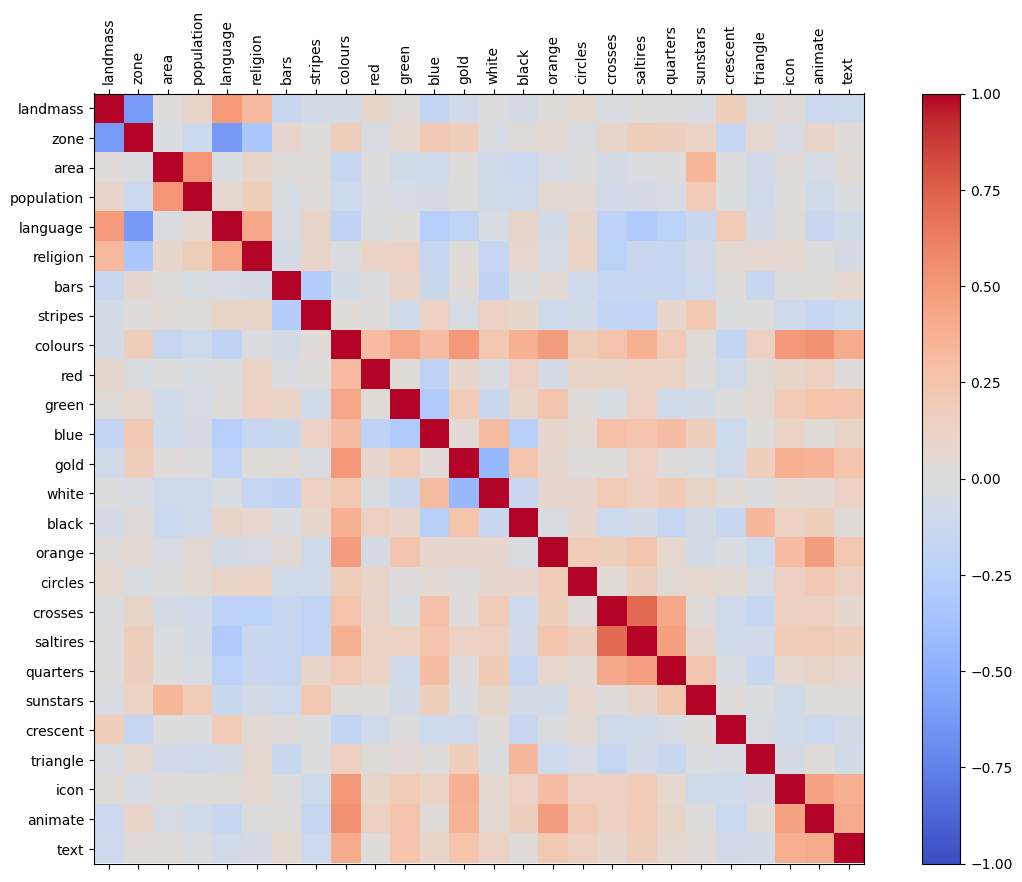

In [13]:
#Исследуем корреляцию признаков
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt

corr = data.drop(columns=['name','topleft','botright','mainhue']).corr()
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.index)
ax.set_yticklabels(corr.columns)
plt.show()

Religion хорошо  коррелирует landmass,bars,red,green,gold !

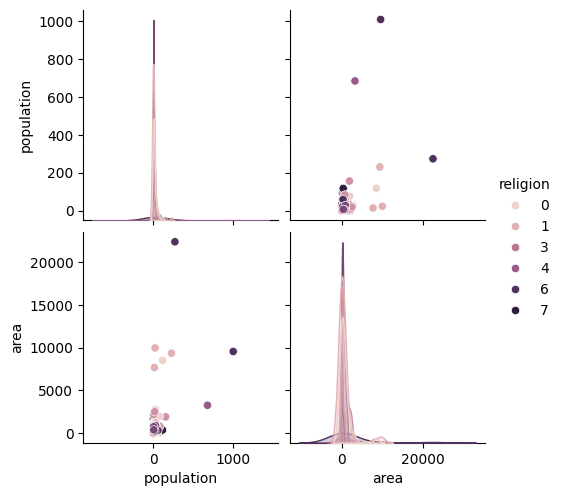

In [15]:
_ = sbs.pairplot(data = data,vars=['population','area'], hue='religion')

Out of plot above we can see some correlations between colors/bars and target variable, but to separate weel one religion from another we need to feed more features

In [16]:
y = data[target]
y.value_counts()

,count
religion,
1,60
0,40
2,36
5,27
6,15
3,8
4,4
7,4


In [17]:
#Подготовка признаков
X = pd.concat([data[continious],data[dummies],pd.get_dummies(data[categoricals])],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   area             194 non-null    int64
 1   population       194 non-null    int64
 2   bars             194 non-null    int64
 3   stripes          194 non-null    int64
 4   colours          194 non-null    int64
 5   circles          194 non-null    int64
 6   crosses          194 non-null    int64
 7   saltires         194 non-null    int64
 8   quarters         194 non-null    int64
 9   sunstars         194 non-null    int64
 10  red              194 non-null    int64
 11  green            194 non-null    int64
 12  blue             194 non-null    int64
 13  gold             194 non-null    int64
 14  white            194 non-null    int64
 15  black            194 non-null    int64
 16  orange           194 non-null    int64
 17  crescent         194 non-null    int64
 18  triangle  

In [18]:
#НЕ ПОНЯЛ ЗАЧЕМ?
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1,test_size=.2)
for trn_idx,tst_idx in sss.split(X,y):
    X_train,y_train = X.iloc[trn_idx],y.iloc[trn_idx]
    X_test,y_test = X.iloc[tst_idx],y.iloc[tst_idx]

assert len(X_train)+len(X_test) == len(y_train)+len(y_test) == len(X) == len(y)

In [19]:
#Строим базовую модель на основе Случайного леса
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
rfc = RandomForestClassifier(max_depth=20,min_samples_leaf=5,n_estimators=100,n_jobs=-1,random_state=42)

score_on_train = 0
for trn_idx,tst_idx in KFold(n_splits=3,random_state=42, shuffle=True).split(X_train,y_train):
    X_train_fold,y_train_fold = X.iloc[trn_idx],y.iloc[trn_idx]
    X_test_fold,y_test_fold = X.iloc[tst_idx],y.iloc[tst_idx]
    rfc.fit(X_train_fold,y_train_fold)
    score_on_train += rfc.score(X_test_fold,y_test_fold)

rfc.fit(X_train,y_train)
print (score_on_train/3)
print(rfc.score(X_test,y_test))


0.574660633484163
0.5641025641025641


In [ ]:
#Определяем оптимальные параметры модели

In [22]:
from sklearn.model_selection import train_test_split
X_train_over,X_test_over,y_train_over,y_test_over = train_test_split(X,y,test_size=.2, random_state=42)


from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,200,500,1000],
          'max_depth':[5,10,15,20,30],
          'min_samples_leaf':[1,5,10,20],
          'random_state':[42],
          'n_jobs':[-1]}

rf_grid = GridSearchCV(RandomForestClassifier(),param_grid=params,verbose=1,n_jobs=-1,cv=3)
rf_grid.fit(X_train_over, y_train_over)
rf_grid.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 10,
 'min_samples_leaf': 1,
 'n_estimators': 100,
 'n_jobs': -1,
 'random_state': 42}

In [25]:
#Запускаем модель с оптимальными характеристиками
X_train_over = X_train_over.astype('int64')
rf_best = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, n_estimators = 1000, n_jobs= -1, random_state= 42)
rf_best.fit(X_train_over,y_train_over)

RandomForestClassifier(max_depth=10, n_estimators=1000, n_jobs=-1,
                       random_state=42)

In [28]:
#Определяем важность признаков через feature_importances_

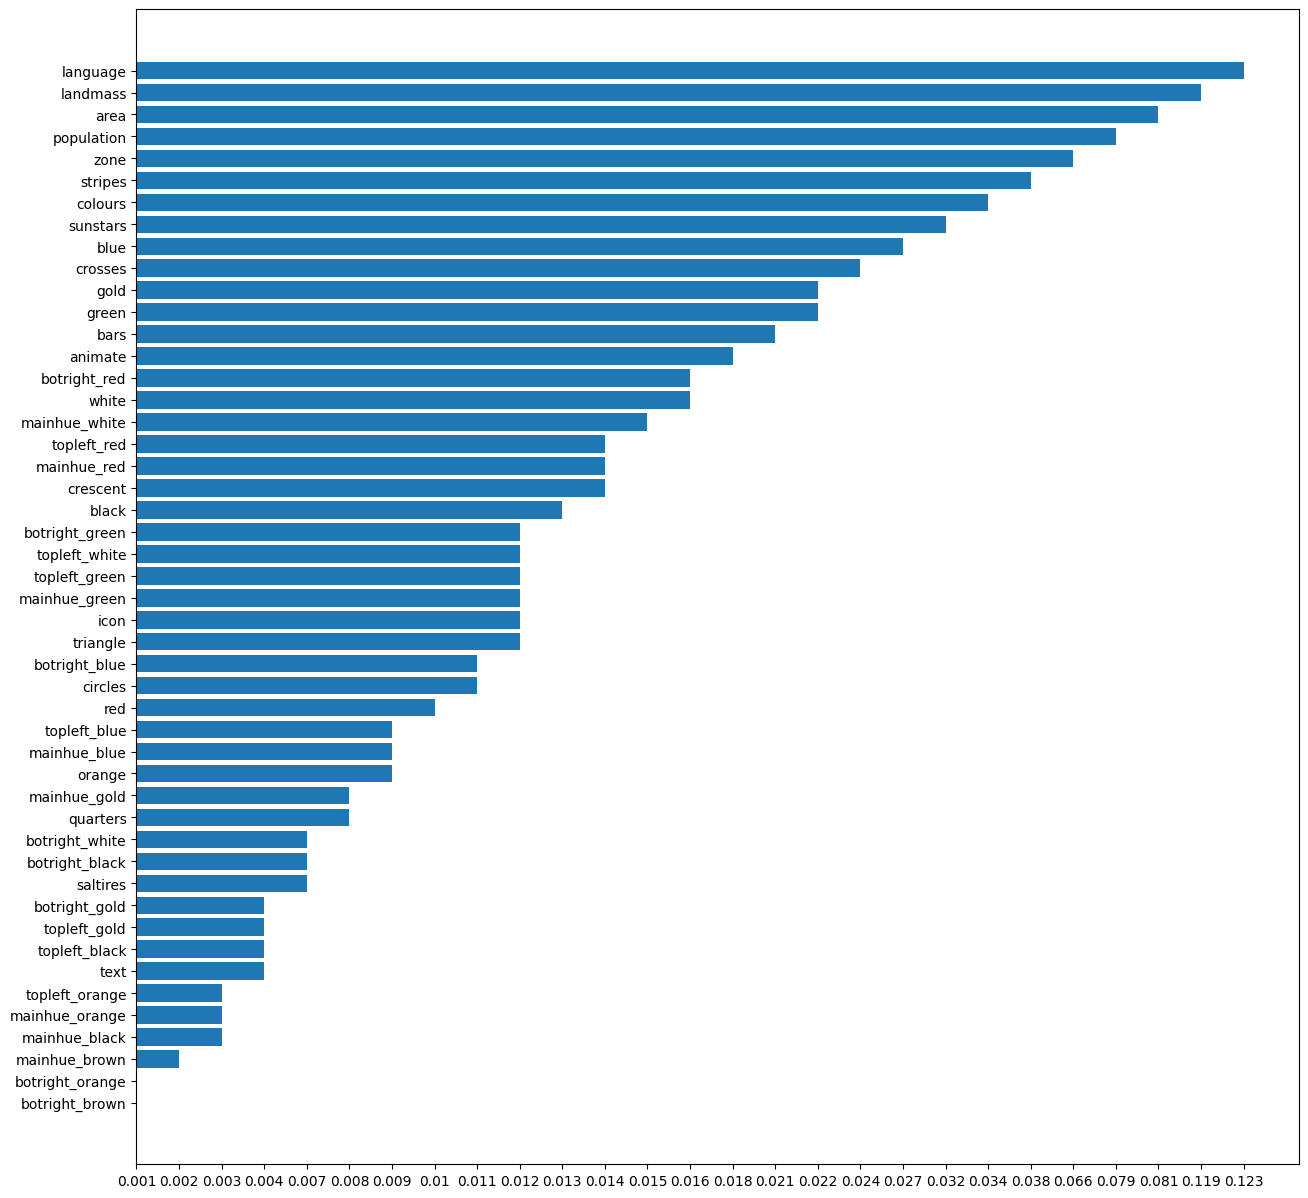

In [27]:
X_over = X.copy()
y_over = y.copy()

feat_imp_dict = {col:np.round(imp,3) for col,imp in zip(X_over.columns,rf_best.feature_importances_)}
feat_imp_dict = np.array(sorted(feat_imp_dict.items(),key=lambda x:x[1]))
labels = list(feat_imp_dict[:,0])
importances = list(feat_imp_dict[:,1])
y_pos = np.arange(len(labels))

plt.figure(figsize=(15,15))
plt.barh(y_pos,importances,align='center')
plt.yticks(y_pos, labels)
_ = plt.show()

Наиболее важные признаки  Feature importance plot match with natural understanding of topic: language, location, area and population are most contirbuting features. At the same time there is no real leader - contribution is quite shared accross features, which is good for model prediction power and explainability.

In [29]:
!pip install -q shap

In [30]:
import shap


explainer = shap.TreeExplainer(rf_best)
shap_values = explainer(X_train_over)

In [31]:
choosen_instance = X_train_over.loc[[1]]
shap_values = explainer.shap_values(choosen_instance)